In [6]:
#dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model as lin 
from sklearn import preprocessing as pre
from sklearn import metrics as met
from sklearn import model_selection as mod
from sklearn import pipeline as pip
from sklearn import datasets as dat
import seaborn as sns

In [2]:
#load the data
data_obj = dat.load_diabetes()
X = data_obj.data
y = data_obj.target

In [5]:
print(data_obj.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

c:\Users\mehmet.sahin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

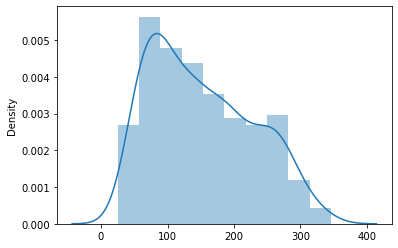

In [7]:
sns.distplot(y)

c:\Users\mehmet.sahin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

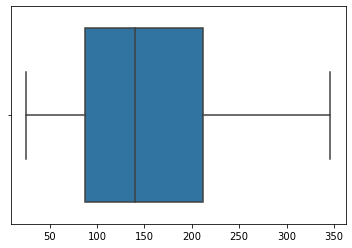

In [8]:
sns.boxplot(y)

In [9]:
X_train,X_test,y_train,y_test = mod.train_test_split(X,y,random_state=42, test_size=0.33)

In [10]:
pipe_sgd = pip.Pipeline([
    ("scaler",pre.StandardScaler()),
    ("sgd", lin.SGDRegressor(random_state=42))
])
mod.cross_val_score(pipe_sgd, X_train, y_train.ravel(), 
                    cv=3, scoring="neg_root_mean_squared_error").mean()*-1 

57.394041142792844

In [11]:
pipe_sgd.fit(X_train,y_train)
y_pred = pipe_sgd.predict(X_test)
met.mean_squared_error(y_test,y_pred,squared=False)

53.50419424139352

In [13]:
mod.cross_val_score(lin.LinearRegression(), X_train, y_train.ravel(), 
                    cv=3, scoring="neg_root_mean_squared_error").mean()*-1 

57.58982361657551